In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

### Betweenness centrality :

Betweenness centrality is a way of detecting the amount of influence a node has over the flow of information in a graph. It is often used to find nodes that serve as a bridge from one part of a graph to another.

it means which super hero has the most link to the other super heros
for example if a super hero wants to connect to the other super hero the betweeness centrality can help them
betweeness centrality is like the path that most of nodes have to go trough if they want to connect to other nodes

### Relation between shortest path and betweeness centrality
The betweenness centrality for each vertex is the number of these shortest paths that pass through the node.

### Degree centrality
Degree centrality is one of the easiest to calculate. The degree centrality of a node is simply its degree—the number of edges it has. The higher the degree, the more central the node is. This can be an effective measure, since many nodes with high degrees also have high centrality by other measures.

The super hero that most of the nodes are connected to.

In [2]:
# #Degree Centrality 
# MF = nx.degree_centrality(he)

# counter = 0
# for w in sorted(MF, key = MF.get , reverse = True):
#     counter = counter + 1
#     if counter == 10:
#         break
#     print(w,'{:0.2f}'.format(MF[w]))

In [3]:
hero_nw = pd.read_csv('/Users/navidabasi/Desktop/hero-network.csv')

In [4]:
edges = pd.read_csv('/Users/navidabasi/Desktop/edges.csv')

In [5]:
nodes = pd.read_csv('/Users/navidabasi/Desktop/nodes.csv')

In [6]:
edges = edges.dropna()

In [61]:
hero_nw

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
...,...,...
574462,COLOSSUS II/PETER RA,CALLISTO
574463,CALLISTO,ROGUE /
574464,CALLISTO,CALIBAN/
574465,CALIBAN/,ROGUE /


In [6]:
hero_nw.dropna()

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
...,...,...
574462,COLOSSUS II/PETER RA,CALLISTO
574463,CALLISTO,ROGUE /
574464,CALLISTO,CALIBAN/
574465,CALIBAN/,ROGUE /


## 1. Data


### First Graph setup

First graph: Will be constructed using the data stored in the 'hero-network.csv' file, in which an edge between two heroes can be found if they have appeared in the same comic together. The number of edges between two heroes represents the number of times they have collaborated in different comics. The graph should be considered weighted and undirected. It is up to you to decide which metric to use to calculate the weights, but we anticipate that the cost will be lower for heroes with more collaborations. Please specify which metric you used to select the weights in the report.

In [8]:
G = nx.from_pandas_edgelist(hero_nw, source = "hero1", target = "hero2")
nx.info(G)

/var/folders/sw/nckv58zd65vctfdplt96f_7m0000gn/T/ipykernel_6555/2098696706.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G)


'Graph with 6426 nodes and 167219 edges'

In [35]:
rp = hero_nw.loc[hero_nw.duplicated()] #This shows only the rows that their value is repeated in the dataset
print(rp)

                       hero1                 hero2
3              LITTLE, ABNER        PRINCESS ZANDA
4              LITTLE, ABNER  BLACK PANTHER/T'CHAL
5       BLACK PANTHER/T'CHAL        PRINCESS ZANDA
23             LITTLE, ABNER  BLACK PANTHER/T'CHAL
25      BLACK PANTHER/T'CHAL        PRINCESS ZANDA
...                      ...                   ...
574461  COLOSSUS II/PETER RA              CALIBAN/
574462  COLOSSUS II/PETER RA              CALLISTO
574463              CALLISTO               ROGUE /
574464              CALLISTO              CALIBAN/
574465              CALIBAN/               ROGUE /

[350286 rows x 2 columns]


We can use above algorithm to add weight to rows in which their values is repeated more than once, I want to make another subset of this dataframe with weight in it and add 1 each time a row is repeated

In [201]:
w1 = hero_nw['hero1'].groupby(hero_nw['hero2']).transform('count')

In [205]:
hero_nw['weight'] = w1

In [206]:
hero_nw

,hero1,hero2,W1,weight
0,"LITTLE, ABNER",PRINCESS ZANDA,15,15
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL,1868,1868
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA,15,15
3,"LITTLE, ABNER",PRINCESS ZANDA,15,15
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL,1868,1868
...,...,...,...,...
574462,COLOSSUS II/PETER RA,CALLISTO,361,361
574463,CALLISTO,ROGUE /,3109,3109
574464,CALLISTO,CALIBAN/,503,503
574465,CALIBAN/,ROGUE /,3109,3109


In [207]:
hero_nw.weight.mean()

1555.9261837494582

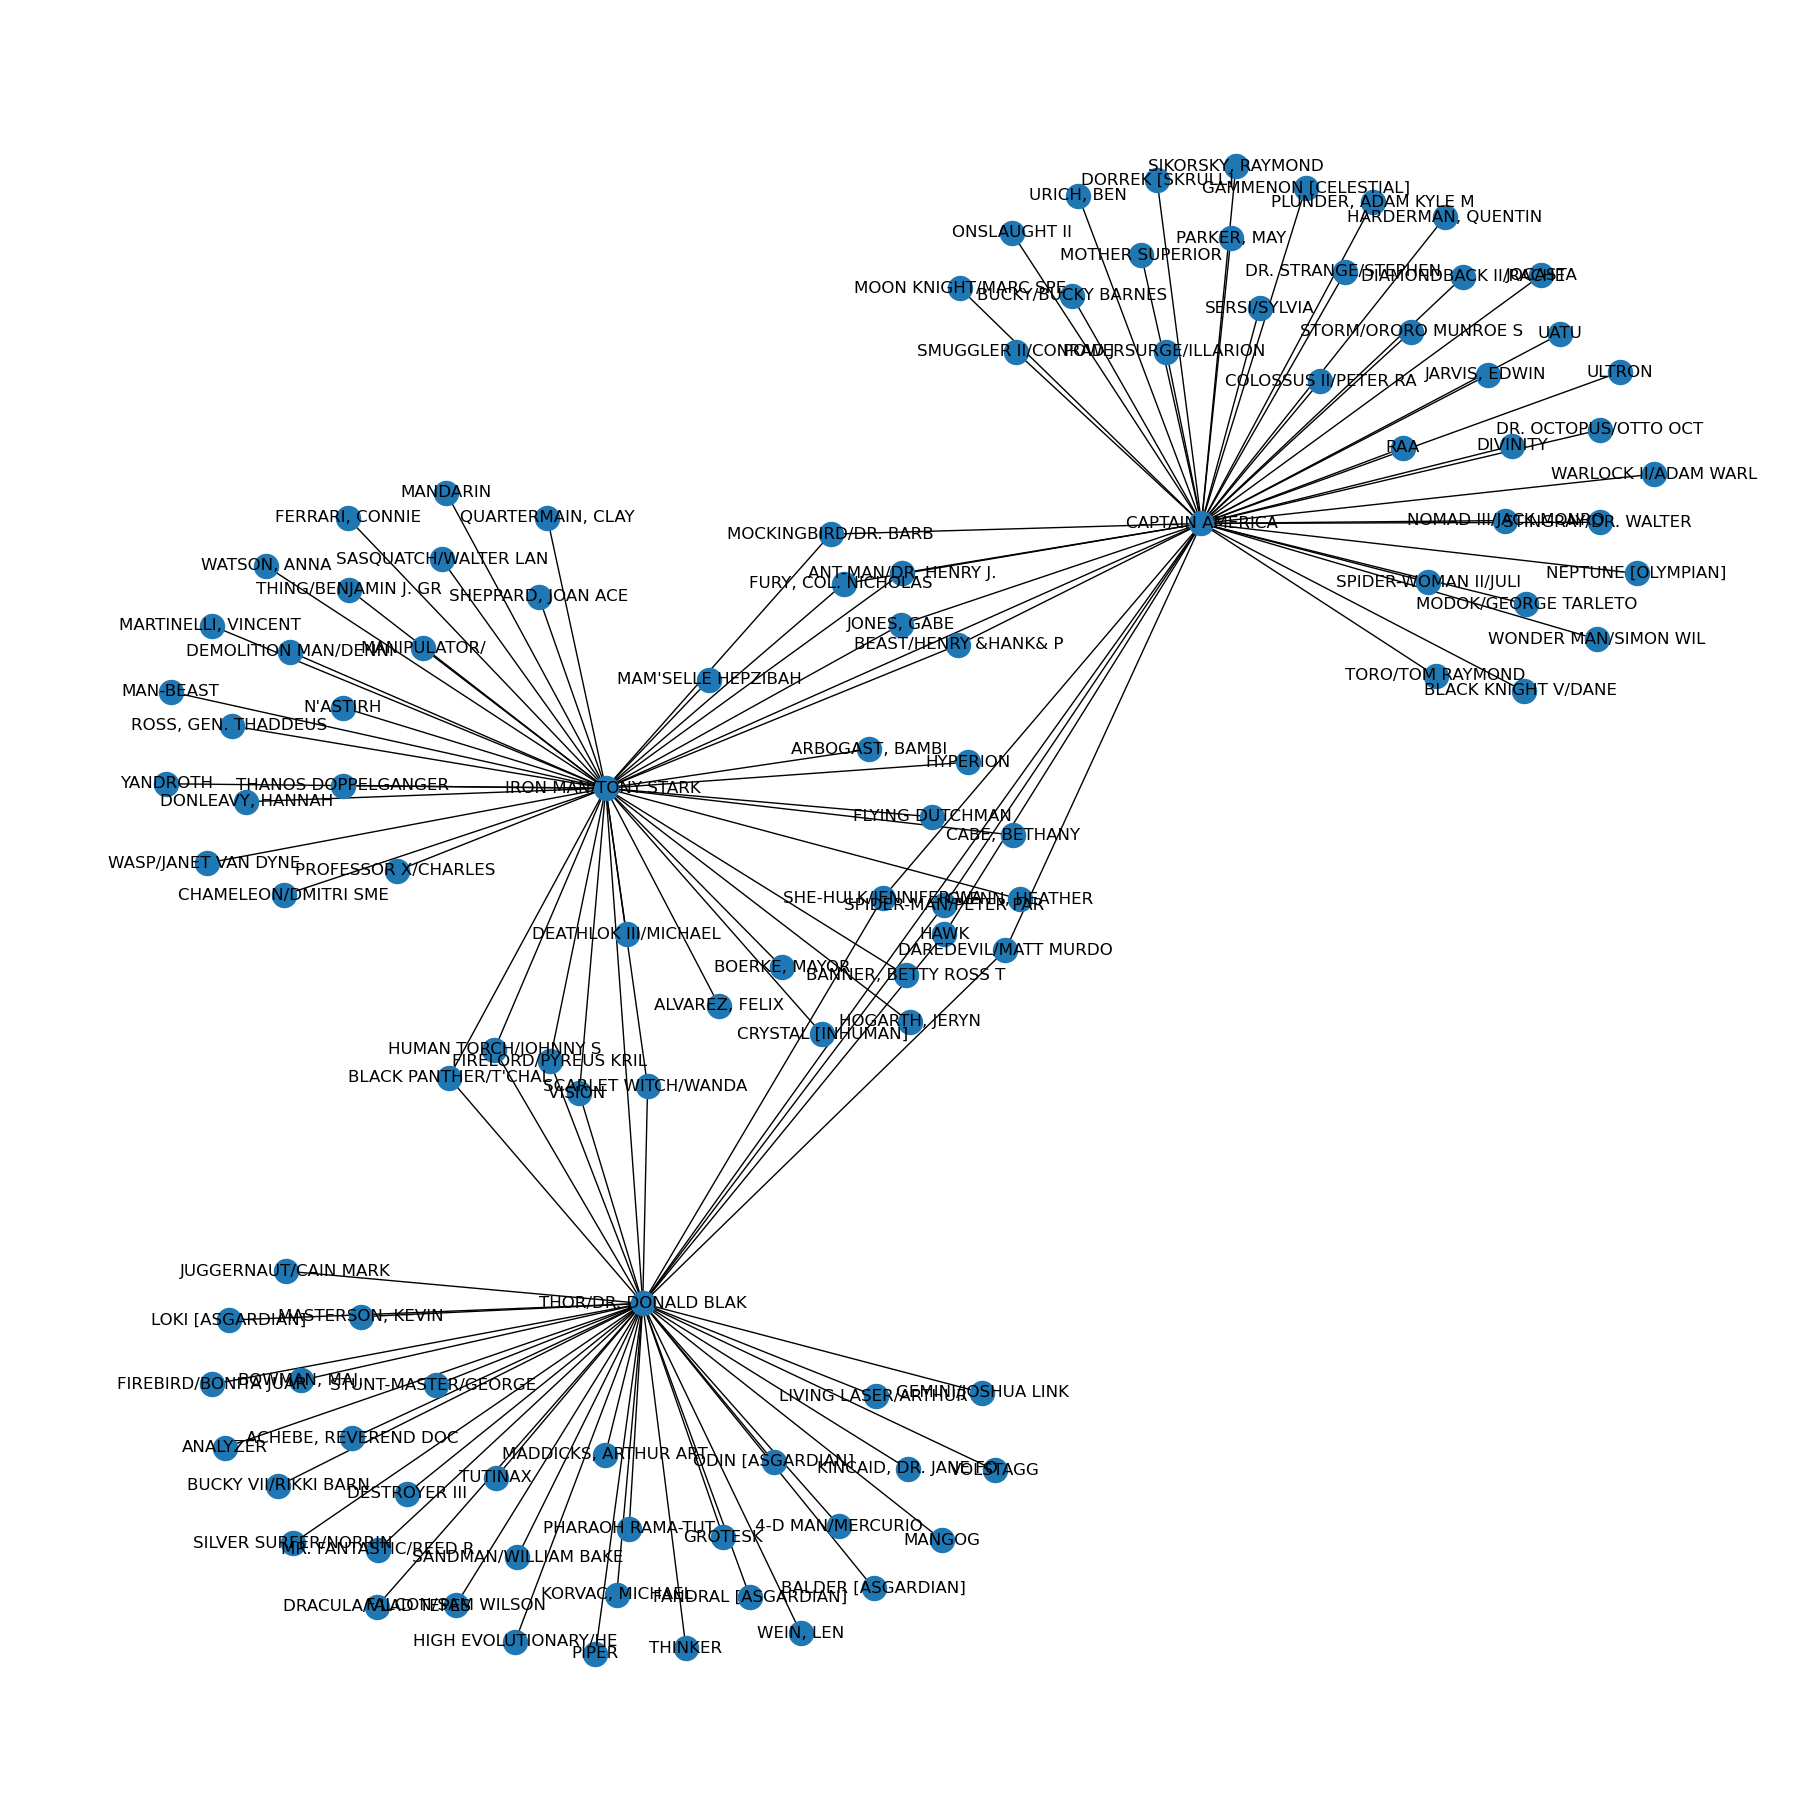

In [215]:
plt.figure(3,figsize=(18,18)) 
plt.clf()
nx.draw(G, with_labels = True)
plt.show()

In [9]:
betweenness = nx.betweenness_centrality(G)

### Graph 2 Setup

Second graph: The data in 'nodes.csv' and 'edges.csv' will be used to construct the second graph. The type of node (hero/comic) can be found in 'nodes.csv', and an edge between a hero node and a comic node can be found in 'edges.csv' when the hero has appeared in that specific comic. This graph is assumed to be undirected and unweighted.

In [128]:
G2 = nx.MultiGraph()

In [130]:
G2.add_nodes_from(nodes)

In [151]:
edgelist = list(zip(edges.hero, edges.comic))

In [152]:
G2.add_edges_from(edgelist)

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [ ]:
plt.clf()
nx.draw(G2, with_labels = True)
plt.show()

### Data Preprocessing
As always, in the data science area, you can find some inconsistencies in the provided data. Therefore, some modifications should be made to the data to make it consistent across all of the datasets you have. To ensure consistency in the data, keep the following in mind:

1) Some of the heroes' names in 'hero-network.csv' are not found in 'edges.csv'. This inconsistency exists for the following reasons:

    • Some heroes' names in 'hero-netowrk.csv' have extra spaces at the end of their names compared to their names in  'edges.csv'.
    
    •Some heroes' names in 'hero-netowrk.csv' have an extra '/' at the end of their names compared to their names in    'edges.csv'.
    
    •The hero name 'SPIDER-MAN/PETER PARKER' in 'edges.csv' has been changed to 'SPIDER-MAN/PETER PAR' in 'hero-        network.csv' due to a string length limit in 'hero-network.csv'.

2) Some entries in the 'hero-network.csv' have the same hero in both columns. In the graph, these entries form a self-loop. Because a self-loop makes no sense in this network, you can safely remove those from the dataset.

In [14]:
if hero_nw['hero1'].equals(hero_nw['hero2']) == True:
    hero_nw = hero_nw.drop()

Seems that dataset hero_nw doesn't contain any duplicates between two columns

In [13]:
print(hero_nw['hero1'].equals(hero_nw['hero2']))

False


## 2. Backend Implementation


Definition: As the number of nodes and edges grows, we may request to work on a subset of the data to reduce computation time and improve network visualization. In this case, we will ask you only to consider the data for top N heros. We define the top N heroes as follows:

Top N heroes: The top N heroes who have appeared in the most number of comics. The 'edges.csv' file, which represents the comics in which each hero has appeared, can be used to filter these N heroes.

Note: When the value of N is not set by the user, the function should consider the whole data.



### Functionality 1 - extract the graph's features

###### Input:

    •The graph data
    •The graph type (ex., number 1 or number 2)
    •N: denoting the top N heroes that their data should be considered
    
    
    
###### Output:

    •The number of nodes in the network (if type 2, report for both node types)
    •The number of collaborations of each superhero with the others (only if type 1)
    •The number of heroes that have appeared in each comic (only if type 2)
    •The network's density
    •The network's degree distribution
    •The average degree of the network
    •The network's Hubs (hubs are nodes having degrees more extensive than the 95th percentile of the degree distribution)
    •Whether the Network is sparse or dense
    
    
Note: For this case, it makes sense to differentiate operations between the two graphs: for example, when computing hubs for the second graph, we likely care only about comics.

### Basic graph types


Graph — Undirected graphs with self loops
 
 
DiGraph — Directed graphs with self loops


MultiGraph — Undirected graphs with self loops and parallel edges


MultiDiGraph — Directed graphs with self loops and parallel edges



Density of a graph: https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.density.html

The Density of a network is defined as the fraction of edges present over all possible edges


In [10]:
def extract_features(data,g_type,N):
    data = list(zip(data.hero1,data.hero2)) #Making an iterable list of nodes
    if g_type == 1:
        G = nx.Graph(data)
        n = G.number_of_nodes()
        m = G.number_of_edges([ i for i in data ])
        d = 2*m/n(n-1)
        dc = nx.degree_centrality(G)
        max_edge = n(n - 1)
        print('The Number of nodes in the Graph G is:', n)
        print('The Number Collaboration between heros is:', dc)
        print('The density of the network is:', d)
        #The network's degree distribution
        print('The Average degree of the Network is:', sum([i for i in dc])/n)
        #The network's Hubs
        if (G.has_edge == False):   #In a desne graph all nodes are at least has 1 edge
            print('Graph is Sparse')
        else:
            print('Graph is Dense')
        

    if g_type == 2:
        G = nx.DiGraph(data)
        n = G.number_of_nodes()
        m = G.number_of_edges([ i for i in data ])
        d = 2*m/n(n-1)
        max_edge = n(n - 1)
        num_heros_comic = data.loc[[i for i in edges.comic]].sum()
        print('The Number of nodes in the Graph G is:', n)
        print('Number of heros in each comic is:', num_heros_comic)
        print('The density of the network is:', d)
        #The network's degree distribution
        print('The Average degree of the Network is:', sum([i for i in dc])/n)
        #The network's Hubs
        if (G.has_edge == False):   #In a desne graph all nodes are at least has 1 edge
            print('Graph is Sparse')
        else:
            print('Graph is Dense')
    
    if g_type == 3:
        G = nx.MultiGraph(data)
        n = G.number_of_nodes()
        m = G.number_of_edges([ i for i in data ])
        d = 2*m/n(n-1)
        dc = nx.degree_centrality(G)
        max_edge = n(n - 1)
        print('The Number of nodes in the Graph G is:', n)
        print('The density of the network is:', d)
        #The network's degree distribution
        print('The Average degree of the Network is:', sum([i for i in dc])/n)
        #The network's Hubs
        if (G.has_edge == False):   #In a desne graph all nodes are at least has 1 edge
            print('Graph is Sparse')
        else:
            print('Graph is Dense')
    
    if g_type == 4:
        G = nx.MultiDiGraph(data)
        n = G.number_of_nodes()
        m = G.number_of_edges([ i for i in data ])
        d = 2*m/n(n-1)
        dc = nx.degree_centrality(G)
        max_edge = n(n - 1)
        print('The Number of nodes in the Graph G is:', n)
        print('The density of the network is:', d)
        #The network's degree distribution
        print('The Average degree of the Network is:', sum([i for i in dc])/n)
        #The network's Hubs
        if nx.density(G) > 0.5:
            print('Graph is Dense')
        else:
            print('Graph is Sparse')

### Functionality 2 - Find top superheroes!


###### Input:
    •The graph data 
    •A node (hero or comic)
    •One of the given metrics : Betweeness 1, PageRank2, ClosenessCentrality 3, DegreeCentrality4
    •N: denoting the top N heroes that their data should be considered
    
###### Output

    •The metric's value over the considered graph
    •The given node's value
    
Note: Give an explanation regarding the features of the user based on all of the metrics (e.g. if the betweenness metric is high, what does this mean in practice, what if the betweenness is low but has a high PageRank value, etc.)

In [27]:
def top_heros(data,node,var,N):
    data = list(zip(data.hero1,data.hero2)) #Making an iterable list of nodes
    G = nx.Graph(data)
    if var ==1:
        print('Betweenness Centrality for the given Graph is:', betweenness_centrality(G))
    if var ==2:
        print('The PageRank value for the given Graph is:', pagerank(G))
    if var ==3:
        print('The Closeness Centrality for the given Graph is:', closeness_centrality(G))
    if var ==4:
        print('The Degree Centrality for the given Graph is:', degree_centrality(G))
    
    fakeGraph = nx.Graph()
    fakeGraph.add_node(node)
    print('Value assigned to the give Node:', fakeGraph.nodes()[1])
    
    print('Metrics Explanation:')
    print('''Betweenness centrality is a way of detecting the amount of influence a node has over the flow of information in a graph. It is often used to find nodes that serve as a bridge from one part of a graph to another. The algorithm calculates shortest paths between all pairs of nodes in a graph.
             This often means that the node will have a higher degree centrality at the result of higher BC''')
    
    print('''PageRank if a node with high centrality links many others then all those others get high centrality. In many cases, however, it means less if a node is only one among many to be linked
            if a node with high centrality links many others then all those others get high centrality''')
    
    print('''The Degree Centrality simply points out the number of edges a node has, the higher the Degree, The higher the degree, the more central the node is.''')
    

## Functionality 3 - Shortest ordered Route

###### Input:
    •The graph data
    •A sequence of superheroes h = [h_2, ..., h_n-1]
    •Initial node h_1 and an end node h_n
    •N: denoting the top N heroes that their data should be considered
###### Output:
    •The shortest walk of comics that you need to read to get from hero_1 to hero_n


Considerations: For this functionality, you need to implement an algorithm that returns the shortest walk that goes from node h_j to h_n, which visits in order the nodes in h. The choice of h_j and h_n can be made randomly (or if it improves the performance of the algorithm, you can also define it in any other way)


###### Important Notes:
    •This algorithm should be run only on the second graph.
    •The algorithm needs to handle the case that the graph is not connected. Thus, only some of the nodes in h are reachable from h_1. In such a scenario, it is enough to let the program give in the output the string "There is no such path".
    •Since we are dealing with walks, you can pass on the same node h_i more than once, but you have to preserve order. E.g., if you start from Spiderman to reach deadpool, and your path requires you to visit iron-man and colossus, you can go back to any comics any time you want, assuming that the order in which you visit the heroes is still the same.

In [3]:
def Shortest_ordered_route(G,s,nodes,N):
    #Data should be a supported type of graph
    G_type = nx.is_directed(G)
    result = G.shortest_simple_paths(data, s[0], s[-1])
    if result == 'path_generator':
        print(result)
    if result == 'NetworkXNoPath':
        print('There is no available path')
    if result == 'NetworkXError':
        print('The source node or the target node are not available in this graph')
    if G_type == False:
        print('This type of graph is not supported')
    print(G.shortest_simple_paths(data, s[0], s[-1]))
    

## Functionality 4 - Disconnecting Graphs

###### Input:
    •The graph data
    •heroA: a superhero to which will relate sub-graph G_a
    •heroB: a superhero to which will relate sub-graph G_b
    •N: denoting the top N heroes that their data should be considered
    

###### Output:
    •The minimum number of links (by considering their weights) required to disconnect the original graph in two disconnected subgraphs: G_a and G_b.

In [4]:
def Disc_graphs(G,heroA,heroB,N):
    links = G.minimum_edge_cut(G, s=heroA, t=heroB, flow_func=None) #Returns a list of edges that should be removed in order to have 2 disconnected subgraphs
    
    for i in link:
        G.remove_edge(i) #it removes the edge between two nodes and make subgraphs for G
    print('The minimum number of edges a disconnected graph (G) could have is:', G.number_of_edges())
    
# One way to check whether two nodes are connected with NetworkX is to check whether a node u is a neighbor of another node v.

# >>> def nodes_connected(u, v):
# ...     return u in G.neighbors(v)
# ... 
# >>> nodes_connected("a", "d")
# False
# >>> nodes_connected("a", "c")
# True
    


## Functionality 5 - Extracting Communities

###### Input:
    The graph data
    N: denoting the top N heroes that their data should be considered
    Hero_1: denoting the name of one of the heroes
    Hero_2: denoting the name of one of the heroes

###### Output:

    The minimum number of edges that should be removed to form communities
    A list of communities, each containing a list of heroes that belong to them.
    If the Hero_1 and Hero_2 belongs to the same community
    
    
Important Notes:
This functionality should only be run on the first graph.
To comprehend this functionality better, we suggest you take a good look at this article:
https://www.analyticsvidhya.com/blog/2020/04/community-detection-graphs-networks/


In [5]:
def extract_comunities(G,N, Hero_1, Hero_2):
  pass  

# 3. Frontend Implementation

In this section, we ask you to build the visualizations for users' query results. We also expect you to showcase plots that can give us the most insight possible and comment accordingly.

## Visualization 1 - Visualize some features of the network


we expect you to have the following report format:

A table containing the following general information about the graph:

    Number of nodes in the network
    Density of the network
    Average degree of the network
    Whether the network is sparse or dense
    A table that lists the network's hubs

    A plot depicting the number of collaborations of each hero in descending order (if the graph is type 1)

    A plot depicting the number of heroes who appeared in each comic, sorted in descending order (if the graph is type 2)

    A plot depicting the degree distribution of the network

    Note: You can do the plot on a limited number of heroes/comic books to have a better visualization for the charts that ask for some insights about all of the comics/heroes (e.g. for the first 50)

In [12]:
cd = dict(G.degree())

print('Graph G has:', G.number_of_nodes(),'Nodes')
print('The Density of Graph G is:', nx.density(G))
print('The Average degree of the Graph G is:', sum(cd.values())/G.number_of_nodes())


Graph G has: 6426 Nodes
The Density of Graph G is: 0.00810031232553549
The Average degree of the Graph G is: 52.044506691565516


In [11]:
if nx.density(G) > 0.5:
    print('Graph is Dense')
else:
    print('Graph is Sparse')

Graph is Sparse


In [13]:
#In the context of a network, a hub is a node with a large degree, meaning it has connections with many other nodes.
print([i for i in nx.degree_centrality(G).values() if i>0.2])
#In this graph there is no node with higher values than this 9 nodes degrees

[0.23688715953307396, 0.2703501945525292, 0.20622568093385216, 0.2969649805447471, 0.21338521400778213, 0.21463035019455254, 0.2203891050583658, 0.20062256809338522, 0.21182879377431907]


In [90]:
h= hero_nw.iloc[:10000,:2]
he = nx.from_pandas_edgelist(h, source = "hero1", target = "hero2")
print(nx.info(he))

Graph with 674 nodes and 6255 edges


/var/folders/zf/rxrqy5ws0f55n3nql62hvvc40000gn/T/ipykernel_1089/2746408406.py:3: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(he))


In [33]:
rank = nx.degree_centrality(G)

counter = 0
for w in sorted(rank, key = rank.get , reverse = True):
    counter = counter + 1
    if counter == 11:
        break
    print(w,'{:0.2f}'.format(rank[w]))

CAPTAIN AMERICA 0.42
IRON MAN/TONY STARK  0.39
THOR/DR. DONALD BLAK 0.37
WASP/JANET VAN DYNE  0.03
SCARLET WITCH/WANDA  0.02
CAPTAIN MARVEL/CAPTA 0.02
HAWK 0.02
BLACK KNIGHT V/DANE  0.02
NIGHTHAWK II/KYLE RI 0.02
SCORPION/MACDONALD G 0.02


In [36]:
Thor = hero_nw[hero_nw['hero1']=='THOR/DR. DONALD BLAK'].sample(50)
Cap = Subset = hero_nw[hero_nw['hero1']=='CAPTAIN AMERICA'].sample(50)
IronMan = hero_nw[hero_nw['hero1'].str.contains('IRON MAN/TONY STARK')].sample(50)
Wasp = hero_nw[hero_nw['hero1'].str.contains('WASP/JANET VAN DYNE')].sample(50)
Hawk = hero_nw[hero_nw['hero1'].str.contains('HAWK')].sample(50)
Knight = hero_nw[hero_nw['hero1'].str.contains('BLACK KNIGHT V/DANE')].sample(50)
NightHawk = hero_nw[hero_nw['hero1'].str.contains('NIGHTHAWK II/KYLE RI')].sample(50)
Scarlet = hero_nw[hero_nw['hero1'].str.contains('SCARLET WITCH/WANDA')].sample(50)
Scorpian = hero_nw[hero_nw['hero1'].str.contains('SCORPION/MACDONALD G')].sample(50)
Spider = hero_nw[hero_nw['hero1'].str.contains('SPIDER-MAN/PETER PAR')].sample(50)

#Since CA comes twice in top 10 I changed it to Spiderman


Subset = pd.concat([Thor,Cap,IronMan],axis = 0)

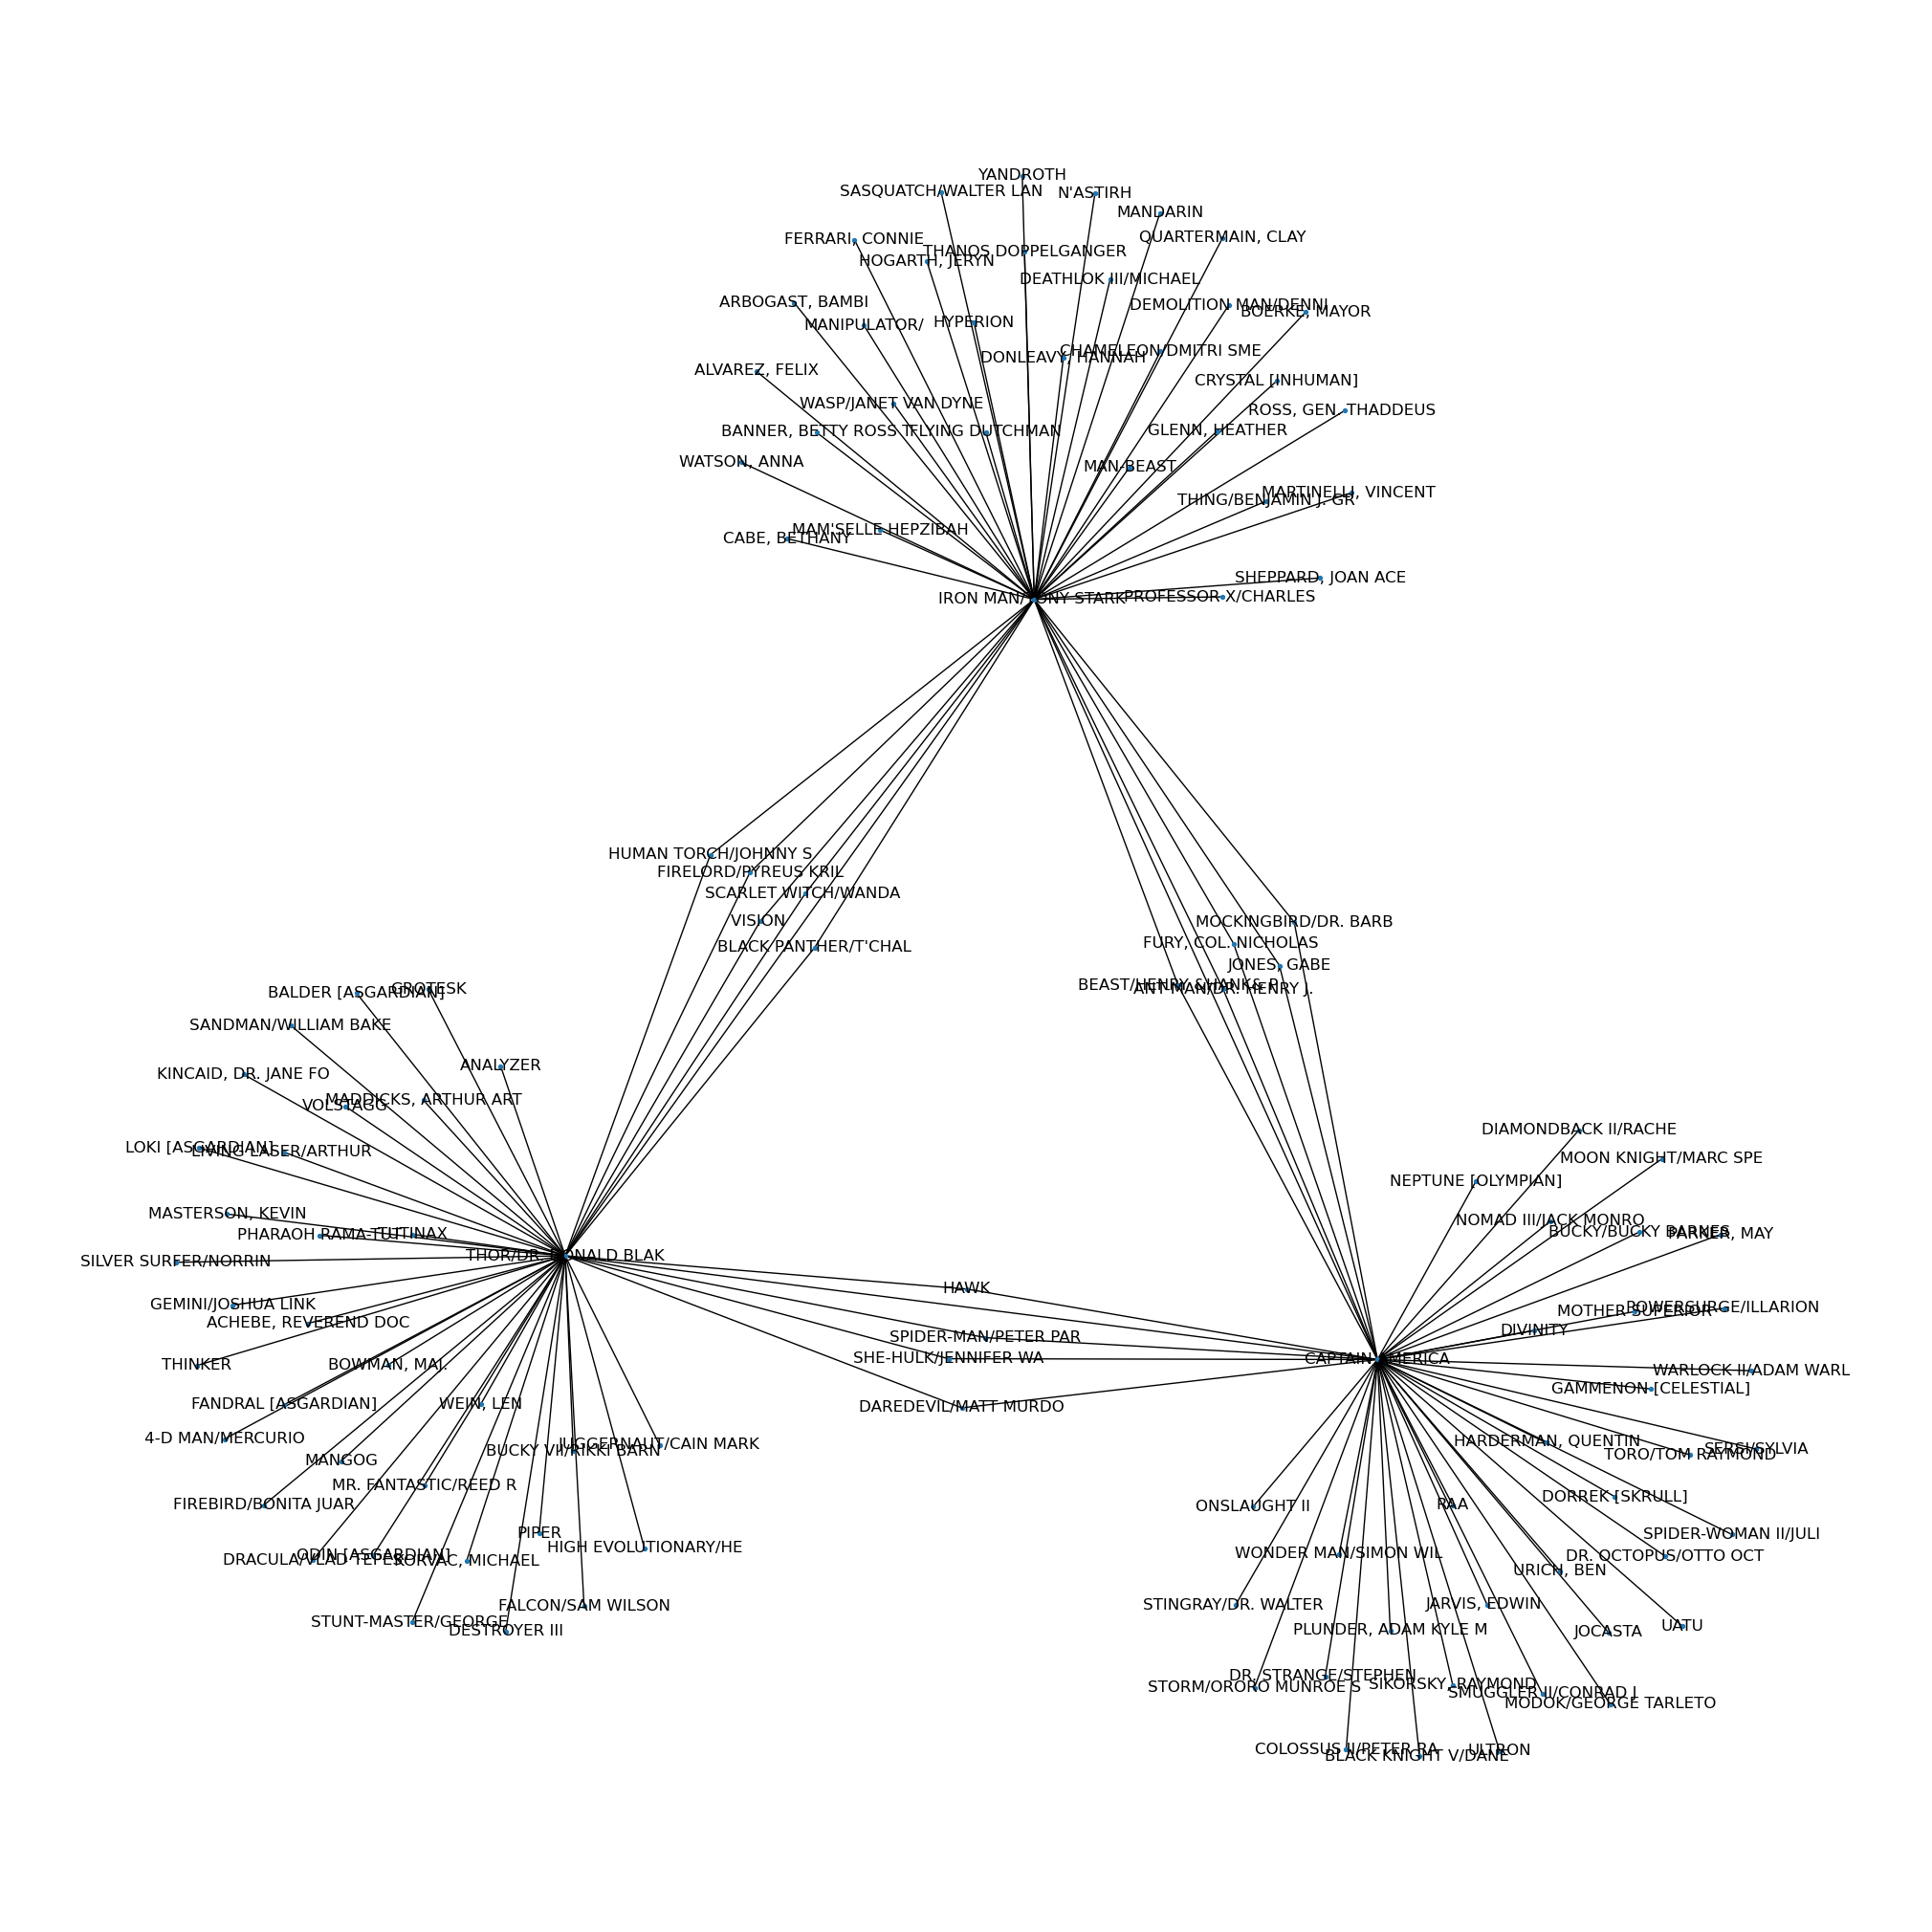

In [35]:
G=nx.from_pandas_edgelist(Subset, 'hero1', 'hero2')
plt.figure(figsize = (20,20))
nx.draw(G, with_labels=True, node_size = 8)
plt.show()

#Ploting only Top 10 heros

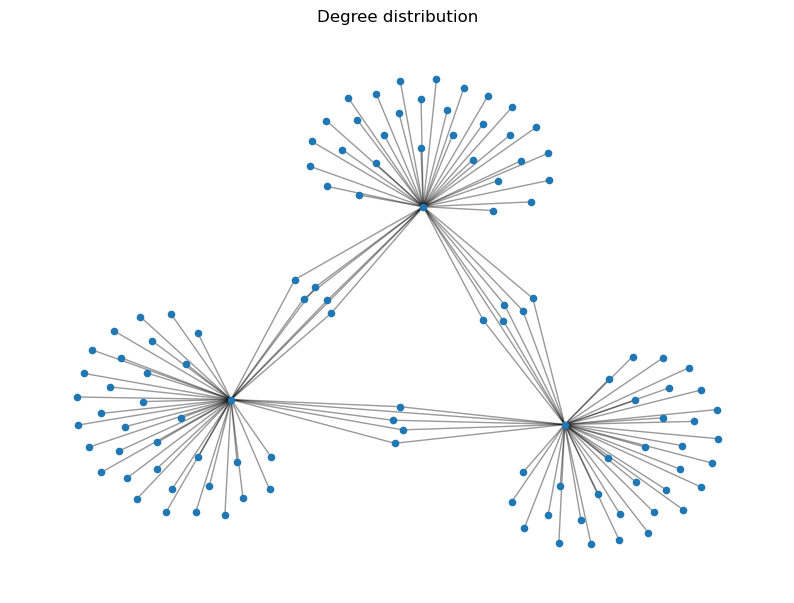

In [79]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence) #Only heros with high degree

fig = plt.figure("Degree of Nodes", figsize=(10, 30))


ax0 = fig.add_subplot(axgrid[0:5, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Degree distribution")
ax0.set_axis_off()


## Visualization 2 - Visualize centrality measure


We anticipate seeing the Functionality 2 report in Visualization 2. To be more specific, we expect you to have the following report format:

    A table containing the information related to the requested centrality measure for:
        The average of the requested centrality measure for all of the network's nodes
        The requested centrality measure's value for the given node


In [83]:
def centrallity(G,typ):
    if typ == betweenness_centrality:
        print('The betweenness centrality for the given Graph is:', nx.betweenness_centrality(G))
    if typ == degree_centrality:
        print('The degree centrality for the given Graph is:',nx.degree_centrality(G))
    if typ == closeness_centrality:
        print('The closeness centrality for the given Graph is:',nx.closeness_centrality(G))
    else:
        print('This function does not support this type of centrality, Please try another one')

## Visualization 3 - Visualize the shortest-ordered route


We anticipate seeing the Functionality 3 report in Visualization 3. To be more specific, we expect you to have the following report format:

    Print the comics in the shortest walk in order
    Plot the graph and identify the nodes and edges that appear in the shortest walk (please put an identifier on each edge in the shortest walk to determine the order that we should have the walk)


In [262]:
edges

,hero,comic
0,24-HOUR MAN/EMMANUEL,AA2 35
1,3-D MAN/CHARLES CHAN,AVF 4
2,3-D MAN/CHARLES CHAN,AVF 5
3,3-D MAN/CHARLES CHAN,COC 1
4,3-D MAN/CHARLES CHAN,H2 251
...,...,...
96099,ZZZAX,H2 326
96100,ZZZAX,H2 327
96101,ZZZAX,M/CP 8/4
96102,ZZZAX,PM 47


In [277]:
nodes

,node,type
0,2001 10,comic
1,2001 8,comic
2,2001 9,comic
3,24-HOUR MAN/EMMANUEL,hero
4,3-D MAN/CHARLES CHAN,hero
...,...,...
19085,"ZOTA, CARLO",hero
19086,ZOTA,hero
19087,ZURAS,hero
19088,ZURI,hero


In [322]:
df = edges.iloc[0:30000]
nL = list(df.itertuples(index=False))
s = dict(nL)
values = dict.values(s)

In [323]:
df1 = pd.DataFrame(nL, columns = ['hero','comic'])

In [324]:
df1

,hero,comic
0,24-HOUR MAN/EMMANUEL,AA2 35
1,3-D MAN/CHARLES CHAN,AVF 4
2,3-D MAN/CHARLES CHAN,AVF 5
3,3-D MAN/CHARLES CHAN,COC 1
4,3-D MAN/CHARLES CHAN,H2 251
...,...,...
29995,GROK,AA2 22
29996,GROK,AA2 23
29997,GROK,AA2 24
29998,GROK,AA2 25


In [317]:
GG = nx.from_pandas_edgelist(df1, 'hero', 'comic')

In [318]:
print(nx.info(GG))

Graph with 12305 nodes and 30000 edges


/var/folders/sw/nckv58zd65vctfdplt96f_7m0000gn/T/ipykernel_6555/3954907851.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(GG))


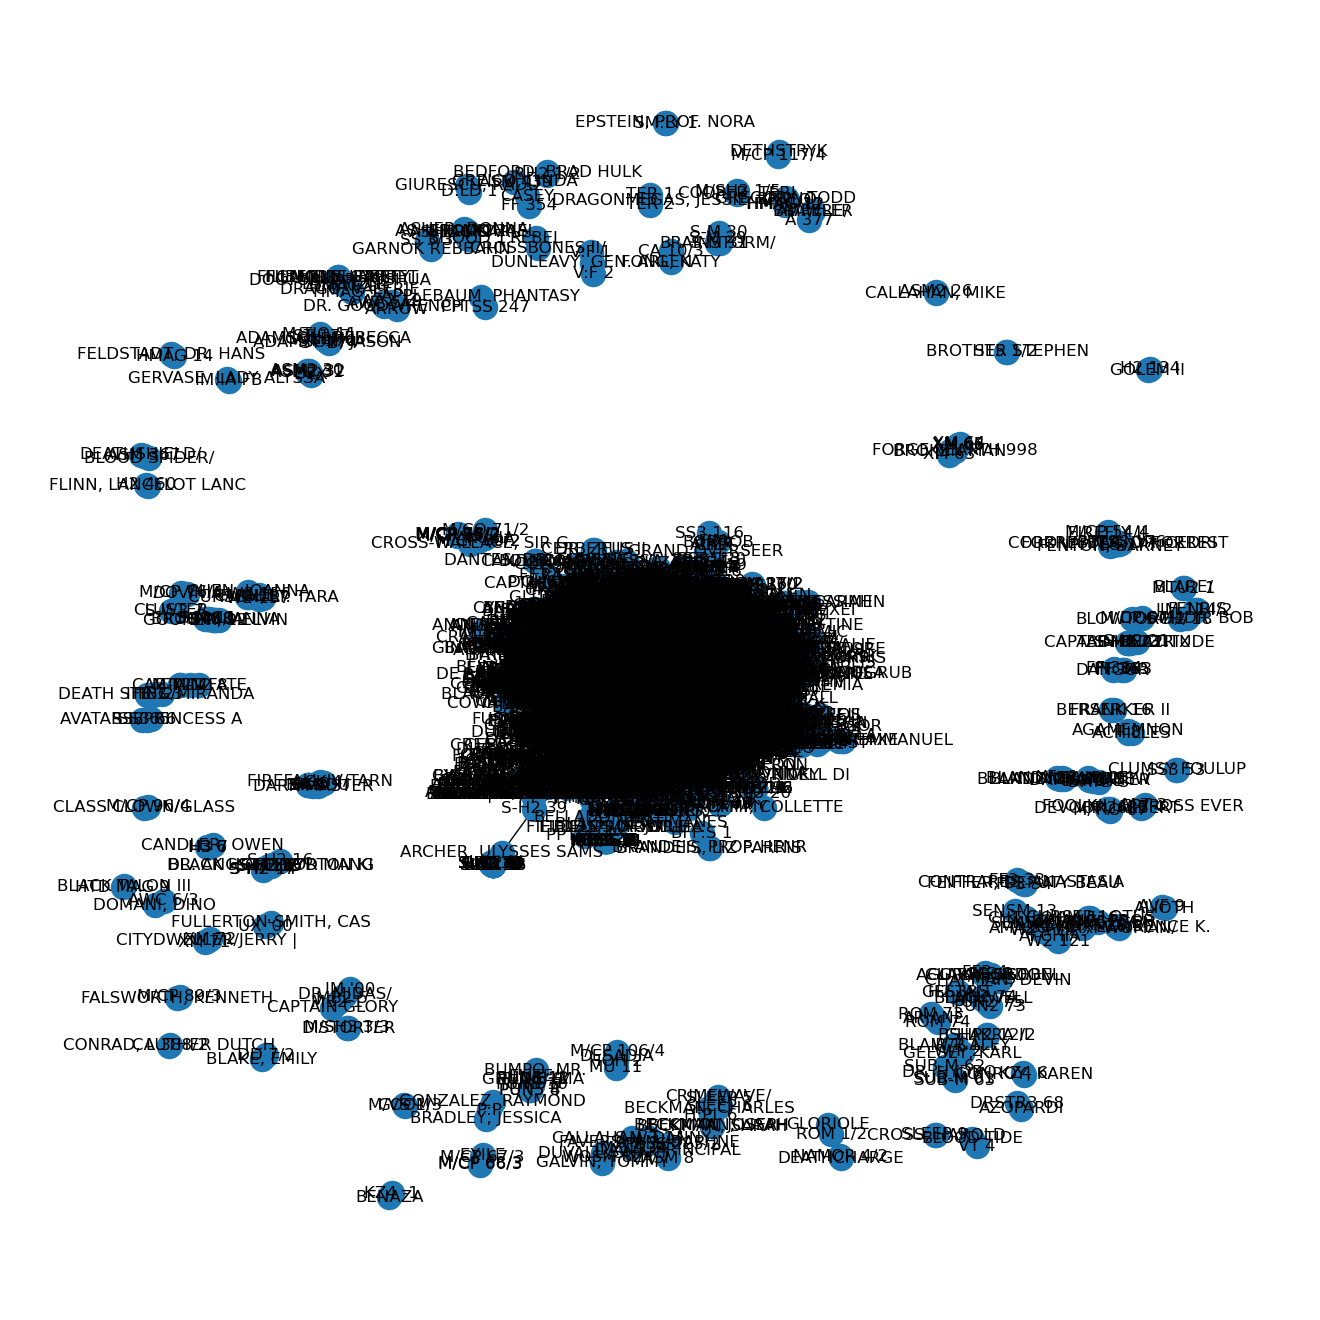

In [319]:
plt.figure(1,figsize=(13,13)) 
plt.clf()
nx.draw(GG, with_labels = True)
plt.show()

In [325]:
nx.average_shortest_path_length(GG)

NetworkXError: Graph is not connected.

In [184]:
data = nodes.groupby(by=['type']) #Grouping data types based on their different types (Comic and Hero)

In [185]:
data = list(data)
eList = []
for i in data[0]:
    eList.append(i)

In [186]:
eList.pop(0)

'comic'

In [187]:
eList

[               node   type
 0           2001 10  comic
 1            2001 8  comic
 2            2001 9  comic
 7             A '00  comic
 8             A '01  comic
 ...             ...    ...
 19021  YOUNG MEN 24  comic
 19022  YOUNG MEN 25  comic
 19023  YOUNG MEN 26  comic
 19024  YOUNG MEN 27  comic
 19025  YOUNG MEN 28  comic
 
 [12651 rows x 2 columns]]

In [188]:
eList.pop()

,node,type
0,2001 10,comic
1,2001 8,comic
2,2001 9,comic
7,A '00,comic
8,A '01,comic
...,...,...
19021,YOUNG MEN 24,comic
19022,YOUNG MEN 25,comic
19023,YOUNG MEN 26,comic
19024,YOUNG MEN 27,comic


In [181]:
# eList = tuple(eList)
# eList

(               node   type
 0           2001 10  comic
 1            2001 8  comic
 2            2001 9  comic
 7             A '00  comic
 8             A '01  comic
 ...             ...    ...
 19021  YOUNG MEN 24  comic
 19022  YOUNG MEN 25  comic
 19023  YOUNG MEN 26  comic
 19024  YOUNG MEN 27  comic
 19025  YOUNG MEN 28  comic
 
 [12651 rows x 2 columns],)

In [216]:
H = nx.Graph()

H.add_edges_from(eList)

In [217]:
nx.info(H)

/var/folders/sw/nckv58zd65vctfdplt96f_7m0000gn/T/ipykernel_6555/3558254297.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(H)


'Graph with 0 nodes and 0 edges'

## Visualization 4 - Visualize the disconnected graph


We anticipate seeing the Functionality 4 report in Visualization 4. To be more specific, we expect you to have the following report format:

    Print the number of the links that should be disconnected
    Plot the original graph
    Plot the graph after removing the links and identify the two nodes

In [328]:
def edge_to_remove(G):
  G_dict = nx.edge_betweenness_centrality(G)
  edge = ()

  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break

  return edge

In [329]:
def girvan_newman(G):
    count = 0
    # find number of connected components
    sg = nx.connected_components(G)
    sg_count = nx.number_connected_components(G)

    while(sg_count == 1):
        count +=1
        graph.remove_edge(edge_to_remove(G)[0], edge_to_remove(G)[1])
        sg = nx.connected_components(G)
        sg_count = nx.number_connected_components(G)
    print(count)
    return sg

In [ ]:
plt.figure(1,figsize=(13,13)) 
plt.clf()
nx.draw(G, with_labels = True)
plt.show()

## Visualization 5 - Visualize the communities


We anticipate seeing the Functionality 5 report in Visualization 5. To be more specific, we expect you to have the following report format:

    Print the number of links that should be removed to have the communities
    A table depicting the communities and the heroes that belong to each community
    Plot the original graph
    Plot the graph showing the communities in the network
    Plot the final graph and identify the community/communities of Hero_1 and Hero_2
Notes:

For the final output of your function, please set the Hero_1 to 'Captain America' and Hero_2 to 'Ironman' and show the results
If Hero_1 and Hero_2 belong to the same community, identify that community; otherwise, identify those two communities that these heroes belong to.


## 6. Algorithmic Question


###### Input:

    The input is a single string that shows the direction of the segment lines and contains only the characters R, L, U, and D, which correspond to the Right, Left, Up, and Down directions. The string's maximum length is 10. It is also guaranteed that two consecutive characters will be different.


###### Output:

    We expect to see only 1 number in the output, corresponding to the number of different patterns that can be generated based on the line segments Alex learned. In some cases, this number may be 0, indicating that no patterns can be generated using the learned line segments.


In [327]:
# to lock the mobile phone
 
sumofdotsonthegrid = 9;
 
# method to find total pattern starting from current cell
def totalPatternFromCur(Right, Left, Up, Down):
    if (Down <= 0):
         
        # if last cell then return 1 way
        if (Down == 0):
            return 1;
        else:
            return 0;
 
    ways = 0;
 
    # make this cell visited before
    # going to next call
    Right[Up] = True;
 
    for i in range(1, sumofdotsonthegrid):
 
        '''
        * if this cell is not visit AND either i and cur are adjacent (then
        * Left[i][Up] = 0) or between cell must be visit already ( then
        * visit[Left[i][Up]] = 1)
        '''
        if (Right[i] == False and (Left[i][Down] == 0 or Right[Left[i][Up]])):
            ways += totalPatternFromCur(Right, Left, i, Down - 1);
 
    # make this cell not visited
    # after returning from call
    Right[Up] = False;
 
    return ways;
 
# method returns number of pattern with
# minimum m connection and maximum n connection
def waysOfConnection(m, n):
    Left = [[0 for i in range(sumofdotsonthegrid)] for j in range(sumofdotsonthegrid)];
 
    # 2 lies between 1 and 3
    Left[1][3] = Left[3][1] = 2;
 
    # 8 lies between 7 and 9
    Left[7][9] = Left[9][7] = 8;
 
    # 4 lies between 1 and 7
    Left[1][7] = Left[7][1] = 4;
 
    # 6 lies between 3 and 9
    Left[3][9] = Left[9][3] = 6;
 
    # 5 lies between 1, 9 2, 8 3, 7 and 4, 6
    Left[1][9] = Left[9][1] = Left[2][8] = Left[8][2] =\
        Left[3][7] = Left[7][3] = Left[4][6] = Left[6][4] = 5;
 
    Right = [False]*sumofdotsonthegrid;
    ways = 0;
    for i in range(m, n + 1):
         
        # 1, 3, 7, 9 are symmetric so multiplying by 4
        ways += 4 * totalPatternFromCur(Right, Left, 1, i - 1);
 
        # 2, 4, 6, 8 are symmetric so multiplying by 4
        ways += 4 * totalPatternFromCur(Right, Left, 2, i - 1);
 
        ways += totalPatternFromCur(Right, Left, 5, i - 1);
 
    return ways;
 
# Driver Code
if __name__ == '_main_':
    minConnect = 6;
    maxConnect = 7;
 
    print(waysOfConnection(minConnect, maxConnect));